# Machine Learning Engineer Nanodegree

### Capstone Project: Starbucks’ Capstone Challenge - Notebook 2.

***Maria Balog  
May 12th, 2020***

### Recap

This project is broken down into a number of notebooks to facilitate ease of testing and trouble-shooting. This is the second notebook of this project, for a full description of the problem, please refer to the first notebook [*here*](Starbucks_Capstone_notebook.ipynb).

In brief, we have a month worth of data for about 15,000 users who may or may not have acted upon digital offers received from Starbucks. Here's what the preprocessed data looks like:

In [2]:
import pandas as pd
import numpy as np
import math

# making sure each feature takes up as little space as possible
dtype_port = {'reward': np.int8,
              'difficulty': np.int8,
              'duration': np.int16,
              'web': np.int8,
              'email': np.int8,
              'mobile': np.int8,
              'social': np.int8,
              'bogo': np.int8,
              'info': np.int8,
              'disc': np.int8 }           
portfolio = pd.read_csv('data/portfolio.csv', dtype=dtype_port)

dtype_prof = {'age': np.int8,
              'male': np.int8,
              'female': np.int8,
              'other': np.int8 ,
              'member_days': np.int16 }
profile   = pd.read_csv('data/profile.csv', dtype=dtype_prof)

offer_received  = pd.read_csv('data/offer_received.csv', dtype={'time': np.int16 })
offer_viewed    = pd.read_csv('data/offer_viewed.csv', dtype={'time': np.int16 })
transaction     = pd.read_csv('data/transaction.csv', dtype={'time': np.int16 })
offer_completed = pd.read_csv('data/offer_completed.csv', dtype={'time': np.int16, 'reward': np.int8 })


### *Types of Offers*

In [2]:
# this dataframe has exactly ten rows
portfolio.head(10)

,offer_id,reward,difficulty,duration,web,email,mobile,social,bogo,info,disc
0,bogo_7d_10,10,10,7,0,1,1,1,1,0,0
1,bogo_5d_10,10,10,5,1,1,1,1,1,0,0
2,info_4d_0,0,0,4,1,1,1,0,0,1,0
3,bogo_7d_5,5,5,7,1,1,1,0,1,0,0
4,disc_10d_20,5,20,10,1,1,0,0,0,0,1
5,disc_7d_7,3,7,7,1,1,1,1,0,0,1
6,disc_10d_10,2,10,10,1,1,1,1,0,0,1
7,info_3d_0,0,0,3,0,1,1,1,0,1,0
8,bogo_5d_5,5,5,5,1,1,1,1,1,0,0
9,disc_7d_10,2,10,7,1,1,1,0,0,0,1


### *Member Data*

The member data contains just under 15 thousand rows with all numerical values except for the member id.

In [3]:
profile.describe()

,age,income,member_days,female,male,other
count,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,65404.991568,608.478988,0.413423,0.572277,0.014300
std,17.383705,21598.299410,419.205158,0.492464,0.494765,0.118729
min,18.000000,30000.000000,86.000000,0.000000,0.000000,0.000000
25%,42.000000,49000.000000,294.000000,0.000000,0.000000,0.000000
50%,55.000000,64000.000000,444.000000,0.000000,1.000000,0.000000
75%,66.000000,80000.000000,883.000000,1.000000,1.000000,0.000000
max,101.000000,120000.000000,1909.000000,1.000000,1.000000,1.000000


In [4]:
profile.head()

,person,age,income,member_days,female,male,other
0,0610b486422d4921ae7d2bf64640c50b,55,112000.0,462,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,75,100000.0,529,1,0,0
2,e2127556f4f64592b11af22de27a7932,68,70000.0,177,0,1,0
3,389bc3fa690240e798340f5a15918d5c,65,53000.0,253,0,1,0
4,2eeac8d8feae4a8cad5a6af0499a211d,58,51000.0,343,0,1,0


### *Portfolio of Interaction between Members and Starbucks*

The `portfolio` data is broken down into four dataframes, one for each event type. They all contain the member id, offer type and time of the event. The `transaction` dataset also contains the `amount` spent, while the `offer completed` dataset contains the `reward` gained by completing the offer. 

In [5]:
# by calling tail() instead of head() we also get an idea of how many rows are in the dataframe
offer_received.tail()

,person,time,offer_id
76272,d087c473b4d247ccb0abfef59ba12b0e,576,bogo_7d_10
76273,cb23b66c56f64b109d673d5e56574529,576,disc_7d_10
76274,6d5f3a774f3d4714ab0c092238f3a1d7,576,disc_7d_7
76275,9dc1421481194dcd9400aec7c9ae6366,576,bogo_7d_10
76276,e4052622e5ba45a8b96b59aba68cf068,576,info_4d_0


In [6]:
offer_viewed.tail()

,person,time,offer_id
57720,d56386cf344c4829bbf420d1895dca37,714,info_3d_0
57721,9b51e8797290403b90d09d864dec4b94,714,info_4d_0
57722,84fb57a7fe8045a8bf6236738ee73a0f,714,info_3d_0
57723,abc4359eb34e4e2ca2349da2ddf771b6,714,info_4d_0
57724,8dda575c2a1d44b9ac8e8b07b93d1f8e,714,disc_10d_20


In [7]:
transaction.tail()

,person,time,amount
138948,b3a1272bc9904337b331bf348c3e8c17,714,1.59
138949,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53
138950,a00058cf10334a308c68e7631c529907,714,3.61
138951,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53
138952,c02b10e8752c4d8e9b73f918558531f7,714,4.05


In [8]:
offer_completed.tail()

,person,time,offer_id,reward
33574,0c027f5f34dd4b9eba0a25785c611273,714,disc_7d_7,3
33575,a6f84f4e976f44508c358cc9aba6d2b3,714,disc_7d_7,3
33576,b895c57e8cd047a8872ce02aa54759d6,714,disc_10d_10,2
33577,8431c16f8e1d440880db371a68f82dd0,714,disc_10d_10,2
33578,24f56b5e1849462093931b164eb803b5,714,disc_10d_10,2


### Problem Statement

Our main areas of query for this project will be, for what demographic groups and what offer types  
- are offers most likely to be viewed within their valid duration?
- are offers most likely to be completed, given that they were viewed?
- can we find a correlation between an offer being viewed and the total amount of transactions within the duration of the offer?


### Implementation

The implementation of the solution consists of the following steps:
- data cleaning and visualization (see [*Notebook 1.*](Starbucks_Capstone_notebook.ipynb))
- feature engineering
- applying KMeans clustering to examine viewing rates
- applying KMeans clustering to examine completion rates
- applying KMeans clustering to examine total transaction amounts
- final evaluation and conclusions

In this notebook, we will focus on the third step: **feature engineering**.


## Feature Engineering 

Now it's time to explore the preprocesed data, and create dataframes that we can feed into our clustering algorithms.
When applying unsupervised ML algorithms in order to answer the above questions, we need to examine:

- the combination of the `offer_received` and `offer_viewed` datasets, 
- the combination of the `offer_received`, `offer_viewed` and `offer_completed` datasets, and
- the combination of the `offer_received`, `offer_viewed` and `transaction` datasets. 

Of course, each of these combinations also need to be joined with the `profile` and `portfolio` datasets, to include the demographic data and the properties of the offers.

The first major question we want to explore is which users will view the offers they receive within the valid duration of the offer. We have already created two separate dataframes for the `offer received` and `offer viewed` datasets, and now we can join them based on their `person` (member_id) and `offer_id` columns. 

***One thing we need to clarify*** is that the `offer_id` can be the same for the same type of offers sent out on different dates, so in this sense, it is more an offer type, rather than a unique id. For example, if the same offer is sent to the same user a second time within the valid duration of the first one, we have no way to know if the user ended up viewing the first one or the second one, so there is some ambiguity, and some of the `offer_viewed` events might be counted multiple times.

### *Combining the Offer Received and Offer Viewed Datasets*

In any case, once we joined the datasets, we will need to check if the offer was viewed within the valid time period, and add a new column that contains the `is_viewed` flag.

In [9]:
# merge the three dataframes containing offer data
df2 = pd.merge(offer_received, offer_viewed, on=['person', 'offer_id'], how='left')
df  = pd.merge(df2, portfolio, on='offer_id')

# calculate how much time passed between receiving and viewing an offer
df.time_y.fillna(value=df.time_x-6, inplace=True)
df['view_time'] = df['time_y']-df['time_x']

print('Number of rows: {}'.format(len(df)))
df.describe().round(2)

Number of rows: 95321


,time_x,time_y,reward,difficulty,duration,web,email,mobile,social,bogo,info,disc,view_time
count,95321.00,95321.00,95321.00,95321.00,95321.00,95321.00,95321.0,95321.00,95321.00,95321.00,95321.0,95321.00,95321.00
mean,331.82,351.53,4.26,7.58,6.46,0.79,1.0,0.91,0.64,0.41,0.2,0.39,19.71
std,196.99,197.73,3.44,5.32,2.19,0.41,0.0,0.28,0.48,0.49,0.4,0.49,149.33
min,0.00,-6.00,0.00,0.00,3.00,0.00,1.0,0.00,0.00,0.00,0.0,0.00,-576.00
25%,168.00,180.00,2.00,5.00,5.00,1.00,1.0,1.00,0.00,0.00,0.0,0.00,-6.00
50%,408.00,402.00,3.00,7.00,7.00,1.00,1.0,1.00,1.00,0.00,0.0,0.00,6.00
75%,504.00,510.00,5.00,10.00,7.00,1.00,1.0,1.00,1.00,1.00,0.0,1.00,42.00
max,576.00,714.00,10.00,20.00,10.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,714.00


In [10]:
# let's see how many offers we counted twice
df2 = df.groupby(['person', 'time_x', 'offer_id']).size()
df2 = df2.reset_index(name='count')

print('\nDataframe containing the number of offer viewed events \nfor each offer received event: \n')
print(df2.describe().round(2))

print('\nRecords where there\'s more than one offer viewed events \nfor a offer received event: \n')
print(df2[df2['count'] > 1].describe().round(2))
df2[df2['count'] > 1].head()



Dataframe containing the number of offer viewed events 
for each offer received event: 

         time_x     count
count  76277.00  76277.00
mean     332.58      1.25
std      196.49      0.51
min        0.00      1.00
25%      168.00      1.00
50%      408.00      1.00
75%      504.00      1.00
max      576.00      5.00

Records where there's more than one offer viewed events 
for a offer received event: 

        time_x     count
count  16613.0  16613.00
mean     328.9      2.15
std      199.0      0.39
min        0.0      2.00
25%      168.0      2.00
50%      336.0      2.00
75%      504.0      2.00
max      576.0      5.00


,person,time_x,offer_id,count
5,00116118485d4dfda04fdbaba9a87b5c,168,bogo_5d_5,2
6,00116118485d4dfda04fdbaba9a87b5c,576,bogo_5d_5,2
22,003d66b6608740288d6cc97a6903f4f0,168,disc_10d_10,2
24,003d66b6608740288d6cc97a6903f4f0,408,disc_10d_10,2
34,004c5799adbf42868b9cff0396190900,168,disc_10d_10,2


The total number of rows checks out, it's a little less than in the `offer received` dataframe, probably due to the members we dropped because of missing/invalid data.

Not having a sufficent id to join the `offer received` and `offer viewed` datasets resulted in over sixteen thousand duplicate records. Let's keep the record with earliest non-negative `view_time` column for each one.  

In [11]:
import sys  
sys.path.insert(0, './source')
        
import sb_data_wrangling as dw
drop_ind = dw.get_invalid_view_indices(df)

***Sanity check #1:*** the number of rows we intend to drop should be the same as the sum of the `count` column minus the number of rows in the same dataframe:

In [12]:
print(len(drop_ind))
df2['count'].sum() - len(df2)

19044


19044

***Sanity check #2:*** the number of remaining rows in `df` should be the same as the number of rows in `df2` (which we got by grouping `df` by the `person`, `offer_id` and `time_x` columns):

In [13]:
df.drop(drop_ind, inplace=True)
df.describe().round(2)

,time_x,time_y,reward,difficulty,duration,web,email,mobile,social,bogo,info,disc,view_time
count,76277.00,76277.00,76277.0,76277.00,76277.0,76277.0,76277.0,76277.0,76277.00,76277.00,76277.0,76277.00,76277.00
mean,332.58,351.66,4.2,7.71,6.5,0.8,1.0,0.9,0.60,0.40,0.2,0.40,19.08
std,196.49,197.21,3.4,5.54,2.2,0.4,0.0,0.3,0.49,0.49,0.4,0.49,61.55
min,0.00,-6.00,0.0,0.00,3.0,0.0,1.0,0.0,0.00,0.00,0.0,0.00,-576.00
25%,168.00,180.00,2.0,5.00,5.0,1.0,1.0,1.0,0.00,0.00,0.0,0.00,0.00
50%,408.00,402.00,5.0,10.00,7.0,1.0,1.0,1.0,1.00,0.00,0.0,0.00,6.00
75%,504.00,510.00,5.0,10.00,7.0,1.0,1.0,1.0,1.00,1.00,0.0,1.00,30.00
max,576.00,714.00,10.0,20.00,10.0,1.0,1.0,1.0,1.00,1.00,1.0,1.00,714.00


Fantastic! We got exactly what we were expecting. Let's finish processing and cleaning up this dataframe.

In [14]:
# create a flag for whether or not offers were viewed within the valid time period
df['is_viewed'] = np.asarray([(df['view_time'] <= df['duration']*24) & (df['view_time'] >= 0)])[0].astype(int)

# the email column has the same value in every row, so it's best to drop it
df.drop(columns=['email', 'time_y', 'view_time'], inplace=True)
df.describe().round(2)


,time_x,reward,difficulty,duration,web,mobile,social,bogo,info,disc,is_viewed
count,76277.00,76277.0,76277.00,76277.0,76277.0,76277.0,76277.00,76277.00,76277.0,76277.00,76277.00
mean,332.58,4.2,7.71,6.5,0.8,0.9,0.60,0.40,0.2,0.40,0.75
std,196.49,3.4,5.54,2.2,0.4,0.3,0.49,0.49,0.4,0.49,0.44
min,0.00,0.0,0.00,3.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
25%,168.00,2.0,5.00,5.0,1.0,1.0,0.00,0.00,0.0,0.00,0.00
50%,408.00,5.0,10.00,7.0,1.0,1.0,1.00,0.00,0.0,0.00,1.00
75%,504.00,5.0,10.00,7.0,1.0,1.0,1.00,1.00,0.0,1.00,1.00
max,576.00,10.0,20.00,10.0,1.0,1.0,1.00,1.00,1.0,1.00,1.00


In [15]:
df.head()

,person,time_x,offer_id,reward,difficulty,duration,web,mobile,social,bogo,info,disc,is_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,bogo_7d_5,5,5,7,1,1,0,1,0,0,1
1,ebe7ef46ea6f4963a7dd49f501b26779,0,bogo_7d_5,5,5,7,1,1,0,1,0,0,0
2,f082d80f0aac47a99173ba8ef8fc1909,0,bogo_7d_5,5,5,7,1,1,0,1,0,0,1
3,c0d210398dee4a0895b24444a5fcd1d2,0,bogo_7d_5,5,5,7,1,1,0,1,0,0,1
4,57dd18ec5ddc46828afb81ec5977bef2,0,bogo_7d_5,5,5,7,1,1,0,1,0,0,0


Next, we need to merge our dataframe with the `profile` data, and save this dataset as a base for creating datasets to examine trends in completing offers and transactions.

In [16]:
offer_viewed_profile = pd.merge(profile, df, on='person')
offer_viewed_profile.to_csv('data/offer_viewed_raw.csv', index=False)

In [17]:
offer_viewed_raw = pd.DataFrame(offer_viewed_profile)
offer_viewed_profile.drop(columns=['person', 'offer_id', 'time_x'], inplace=True)
offer_viewed_profile.describe().round(2)

,age,income,member_days,female,male,other,reward,difficulty,duration,web,mobile,social,bogo,info,disc,is_viewed
count,66501.00,66501.00,66501.00,66501.00,66501.00,66501.00,66501.0,66501.00,66501.00,66501.0,66501.0,66501.00,66501.00,66501.0,66501.00,66501.00
mean,54.37,65371.62,607.90,0.41,0.57,0.01,4.2,7.71,6.51,0.8,0.9,0.60,0.40,0.2,0.40,0.74
std,17.40,21623.29,419.22,0.49,0.49,0.12,3.4,5.55,2.20,0.4,0.3,0.49,0.49,0.4,0.49,0.44
min,18.00,30000.00,86.00,0.00,0.00,0.00,0.0,0.00,3.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00
25%,42.00,49000.00,294.00,0.00,0.00,0.00,2.0,5.00,5.00,1.0,1.0,0.00,0.00,0.0,0.00,0.00
50%,55.00,64000.00,444.00,0.00,1.00,0.00,5.0,10.00,7.00,1.0,1.0,1.00,0.00,0.0,0.00,1.00
75%,66.00,80000.00,884.00,1.00,1.00,0.00,5.0,10.00,7.00,1.0,1.0,1.00,1.00,0.0,1.00,1.00
max,101.00,120000.00,1909.00,1.00,1.00,1.00,10.0,20.00,10.00,1.0,1.0,1.00,1.00,1.0,1.00,1.00


This results in slightly less rows, since we dropped users who had missing/invalid data.

So far so good, let's save this dataframe and move on to creating the other two datasets to examine trends for offers completed and the affect of offers on total transactions.

In [18]:
offer_viewed_profile.to_csv('data/offer_viewed_profile.csv', index=False)

### *Combining the Offer Viewed and Offer Completed Datasets*

Previously, we already combined the `offer_received` and `offer_viewed` dataframes with the `profile` and `portfolio` data. Now we can merge it with the `offer_completed` dataset, keeping only records where the offers were viewed.

In [19]:
offer_comp = pd.DataFrame(offer_viewed_raw[offer_viewed_raw['is_viewed'] > 0])
offer_comp = pd.merge(offer_comp, offer_completed, on=['person', 'offer_id', 'reward'], how='left')
print(offer_comp.columns)                                    

Index(['person', 'age', 'income', 'member_days', 'female', 'male', 'other',
       'time_x', 'offer_id', 'reward', 'difficulty', 'duration', 'web',
       'mobile', 'social', 'bogo', 'info', 'disc', 'is_viewed', 'time'],
      dtype='object')


In [20]:
offer_comp[['time_x', 'time', 'duration', 'bogo', 'info', 'disc']].describe()  

,time_x,time,duration,bogo,info,disc
count,57636.000000,36825.000000,57636.000000,57636.000000,57636.000000,57636.000000
mean,330.126171,392.635764,6.512197,0.450673,0.149247,0.400080
std,198.069225,194.538830,2.114311,0.497565,0.356335,0.489918
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,168.000000,222.000000,5.000000,0.000000,0.000000,0.000000
50%,336.000000,426.000000,7.000000,0.000000,0.000000,0.000000
75%,504.000000,558.000000,7.000000,1.000000,0.000000,1.000000
max,576.000000,714.000000,10.000000,1.000000,1.000000,1.000000


Next, we need to make sure we only keep records where the offer type is `bogo` or `disc` (since offer completed for `info` isn't defined), and check if the offer was completed within `duration` from `time_x`. Then drop all unnecessary columns.

In [21]:
offer_comp = offer_comp[offer_comp['info']<1]
offer_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49034 entries, 0 to 57635
Data columns (total 20 columns):
person         49034 non-null object
age            49034 non-null int8
income         49034 non-null float64
member_days    49034 non-null int16
female         49034 non-null int8
male           49034 non-null int8
other          49034 non-null int8
time_x         49034 non-null int16
offer_id       49034 non-null object
reward         49034 non-null int8
difficulty     49034 non-null int8
duration       49034 non-null int16
web            49034 non-null int8
mobile         49034 non-null int8
social         49034 non-null int8
bogo           49034 non-null int8
info           49034 non-null int8
disc           49034 non-null int8
is_viewed      49034 non-null int32
time           36825 non-null float64
dtypes: float64(2), int16(3), int32(1), int8(12), object(2)
memory usage: 2.9+ MB


We can see that about twelve thousand values are missing in the `time` column, which is the timestamp on offer completions (*Note: `time_x` is the timestamp on `offer_received` events, the `_x` was automatically added when we merged two dataframes with identical `time` column ids*).

So first, we can replace these `null` values with `-1`, which will aid us with the following calculations: calculating the time passed between receiving and completing an offer, and making sure that it is within the valid duration of the offer.

In [22]:
offer_comp.fillna(value=-1, axis=1, inplace=True)

offer_comp['comp_time'] = offer_comp['time']-offer_comp['time_x']
offer_comp['is_completed'] = np.asarray([(offer_comp['comp_time'] >= 0) & (offer_comp['comp_time'] <= offer_comp['duration']*24)])[0].astype(int)

offer_comp.drop(columns=['time', 'time_x', 'comp_time', 'is_viewed', 'info'], inplace=True)
offer_comp.drop(columns=['person', 'offer_id'], inplace=True)

offer_comp.head()


,age,income,member_days,female,male,other,reward,difficulty,duration,web,mobile,social,bogo,disc,is_completed
0,75,100000.0,529,1,0,0,5,5,7,1,1,0,1,0,1
1,75,100000.0,529,1,0,0,5,5,5,1,1,1,1,0,1
2,75,100000.0,529,1,0,0,10,10,7,0,1,1,1,0,1
4,68,70000.0,177,0,1,0,5,5,7,1,1,0,1,0,1
5,68,70000.0,177,0,1,0,2,10,7,1,1,0,0,1,0


Now we have a clean dataframe that only contains the demographic data, the properties of various offers and a flag for whether or not the person completed this offer. Let's save this dataframe and move on to creating the necessary features to evaluate user transactions.

In [23]:
offer_comp.to_csv('data/offer_completed_profile.csv', index=False)

### *Combining the Offer Viewed and Transaction Datasets*

Previously, we already combined the `offer_received` and `offer_viewed` dataframes with the `profile` and `portfolio` data. Now we can merge it with the `transaction` dataset, focusing on the total amount of transactions within the valid duration of an offer where the offers were viewed vs. where they weren't viewed.

In [24]:
offer_viewed_raw.describe().round(2)

,age,income,member_days,female,male,other,time_x,reward,difficulty,duration,web,mobile,social,bogo,info,disc,is_viewed
count,66501.00,66501.00,66501.00,66501.00,66501.00,66501.00,66501.00,66501.0,66501.00,66501.00,66501.0,66501.0,66501.00,66501.00,66501.0,66501.00,66501.00
mean,54.37,65371.62,607.90,0.41,0.57,0.01,332.61,4.2,7.71,6.51,0.8,0.9,0.60,0.40,0.2,0.40,0.74
std,17.40,21623.29,419.22,0.49,0.49,0.12,196.53,3.4,5.55,2.20,0.4,0.3,0.49,0.49,0.4,0.49,0.44
min,18.00,30000.00,86.00,0.00,0.00,0.00,0.00,0.0,0.00,3.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00
25%,42.00,49000.00,294.00,0.00,0.00,0.00,168.00,2.0,5.00,5.00,1.0,1.0,0.00,0.00,0.0,0.00,0.00
50%,55.00,64000.00,444.00,0.00,1.00,0.00,408.00,5.0,10.00,7.00,1.0,1.0,1.00,0.00,0.0,0.00,1.00
75%,66.00,80000.00,884.00,1.00,1.00,0.00,504.00,5.0,10.00,7.00,1.0,1.0,1.00,1.00,0.0,1.00,1.00
max,101.00,120000.00,1909.00,1.00,1.00,1.00,576.00,10.0,20.00,10.00,1.0,1.0,1.00,1.00,1.0,1.00,1.00


If we examine the `amount` values in the `transaction` dataset below, we find that while the possible values range between `0.05` and `1062.28`, the mean is only `12.78`, and only about 1% of the `amount` values are more than 40 dollars, so from here on out, we will disregard these rows. 

In [25]:
transaction.describe(percentiles=[.01, .5, .99]).round(2)

,time,amount
count,138953.00,138953.00
mean,381.58,12.78
std,201.70,30.25
min,0.00,0.05
1%,6.00,0.15
50%,402.00,8.89
99%,708.00,40.02
max,714.00,1062.28


In [26]:
transaction = transaction[transaction['amount']<40]

transaction.amount.plot.hist(bins=100, figsize=(15,5));

We can also reduce the skewness of this column using logarithmic transformation. This should be done after aggregating the `amount`s by `person`, `offer_id`, `time_x` (time received) and `valid_flag`.

First, let's join the `offer_viewed` and `transaction` datasets, excluding all `info` type offers.

In [27]:
offer_trans = pd.merge(offer_viewed_raw[offer_viewed_raw['info']<1], transaction, on=['person'])
offer_trans['time_y'] = offer_trans['time']

offer_trans.drop(columns=['info', 'time'], inplace=True)
offer_trans.describe().round(2)                            

,age,income,member_days,female,male,other,time_x,reward,difficulty,duration,web,mobile,social,bogo,disc,is_viewed,amount,time_y
count,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.00,456385.0,456385.0,456385.00,456385.00,456385.00
mean,52.54,61536.75,722.39,0.40,0.59,0.01,330.73,5.25,9.57,7.26,0.87,0.88,0.64,0.5,0.5,0.78,12.08,381.02
std,17.89,20536.65,440.19,0.49,0.49,0.12,197.06,3.02,4.35,1.79,0.34,0.32,0.48,0.5,0.5,0.41,9.35,201.90
min,18.00,30000.00,86.00,0.00,0.00,0.00,0.00,2.00,5.00,5.00,0.00,0.00,0.00,0.0,0.0,0.00,0.05,0.00
25%,39.00,45000.00,362.00,0.00,0.00,0.00,168.00,2.00,7.00,7.00,1.00,1.00,0.00,0.0,0.0,1.00,3.57,210.00
50%,54.00,59000.00,641.00,0.00,1.00,0.00,336.00,5.00,10.00,7.00,1.00,1.00,1.00,0.0,1.0,1.00,10.53,402.00
75%,65.00,73000.00,1007.00,1.00,1.00,0.00,504.00,10.00,10.00,10.00,1.00,1.00,1.00,1.0,1.0,1.00,18.78,552.00
max,101.00,120000.00,1909.00,1.00,1.00,1.00,576.00,10.00,20.00,10.00,1.00,1.00,1.00,1.0,1.0,1.00,39.99,714.00


The size of this dataframe is over three times the size of the `transaction` dataframe, which means that each row in `transaction` was added to the `offers_viewed_raw` dataframe over three times on average. So we need to decide which one of the duplicates to keep and how to delete the rest.

In [28]:
offer_trans['purc_time'] = offer_trans['time_y']-offer_trans['time_x']
columns = ['person', 'offer_id', 'amount', 'time_x', 'time_y', 'purc_time', 'duration', 'is_viewed']

offer_trans = offer_trans.sort_values(by=['person', 'time_y', 'amount', 'purc_time'])
offer_trans[offer_trans['person'] == '004c5799adbf42868b9cff0396190900'][columns].head(12).round(3)     

,person,offer_id,amount,time_x,time_y,purc_time,duration,is_viewed
75356,004c5799adbf42868b9cff0396190900,disc_10d_10,28.29,576,228,-348,10,1
75378,004c5799adbf42868b9cff0396190900,bogo_5d_5,28.29,504,228,-276,5,1
75367,004c5799adbf42868b9cff0396190900,bogo_5d_5,28.29,408,228,-180,5,1
75389,004c5799adbf42868b9cff0396190900,bogo_7d_10,28.29,336,228,-108,7,0
75345,004c5799adbf42868b9cff0396190900,disc_10d_10,28.29,168,228,60,10,1
75357,004c5799adbf42868b9cff0396190900,disc_10d_10,23.93,576,264,-312,10,1
75379,004c5799adbf42868b9cff0396190900,bogo_5d_5,23.93,504,264,-240,5,1
75368,004c5799adbf42868b9cff0396190900,bogo_5d_5,23.93,408,264,-144,5,1
75390,004c5799adbf42868b9cff0396190900,bogo_7d_10,23.93,336,264,-72,7,0
75346,004c5799adbf42868b9cff0396190900,disc_10d_10,23.93,168,264,96,10,1


If we look at all the possible transactions for a randomly selected person, again, we find that there is no way to determine exactly if that person was making purchases due to receiving or viewing any specific offer. So we'll make the assumption that if a purchase falls within the valid duration of an offer that the person received and viewed, then this purchase is due to that offer. We will eliminate all other duplicates based on this assumption, keeping the earliest transaction in the valid duration, if there is one, otherwise just keep the earliest of all duplicates. 

In [29]:
%%time
drop_ind = dw.get_valid_transaction_indices(offer_trans)   

Wall time: 1min 17s


***Sanity check #1:*** the number of rows we intend to drop should be the same as the sum of the `count` column minus the number of rows in the duplicate transaction counting dataframe (i.e. the number of duplicates we need to eliminate):

In [30]:
# construct a duplicate transaction counting dataframe using person, time_y, amount as "primary key"
df2 = offer_trans.groupby(['person', 'time_y', 'amount']).size()
df2 = df2.reset_index(name='count')

print(len(drop_ind))
df2['count'].sum() - len(df2)

334078


334078

In [31]:
offer_trans.drop(drop_ind, inplace=True)
offer_trans[columns].describe().round(2)

,amount,time_x,time_y,purc_time,duration,is_viewed
count,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00
mean,12.12,306.98,381.18,74.20,7.26,0.85
std,9.34,199.92,201.81,107.16,1.80,0.36
min,0.05,0.00,0.00,-576.00,5.00,0.00
25%,3.61,168.00,210.00,30.00,5.00,1.00
50%,10.62,336.00,402.00,66.00,7.00,1.00
75%,18.84,504.00,552.00,120.00,10.00,1.00
max,39.99,576.00,714.00,714.00,10.00,1.00


***Sanity check #2:*** Let's see if all the duplicates were eliminated.

In [32]:
# reconstruct a duplicate transaction counting dataframe
df2 = offer_trans.groupby(['person', 'time_y', 'amount']).size()
df2 = df2.reset_index(name='count')

df2.describe()

,time_y,amount,count
count,122307.000000,122307.000000,122307.0
mean,381.183939,12.124794,1.0
std,201.807274,9.344909,0.0
min,0.000000,0.050000,1.0
25%,210.000000,3.610000,1.0
50%,402.000000,10.620000,1.0
75%,552.000000,18.840000,1.0
max,714.000000,39.990000,1.0


This all checks out. 

Next we need to create a new column that indicates whether or not the transaction happened within the valid duration of the offer. Then we can sum up all the transaction amounts for each `person`, `offer_id` and `valid_flag` to see how much of the spendings can be considered due to receiveing an offer, and how much money was spend outside of the influence ofthe offers.

In [33]:
offer_trans.describe().round(2)

,age,income,member_days,female,male,other,time_x,reward,difficulty,duration,web,mobile,social,bogo,disc,is_viewed,amount,time_y,purc_time
count,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00,122307.00,122307.0,122307.00,122307.0,122307.0,122307.00,122307.00,122307.00,122307.00
mean,52.66,61632.92,719.21,0.40,0.59,0.01,306.98,5.27,9.39,7.26,0.86,0.9,0.69,0.5,0.5,0.85,12.12,381.18,74.20
std,17.91,20510.41,439.22,0.49,0.49,0.12,199.92,3.09,4.05,1.80,0.35,0.3,0.46,0.5,0.5,0.36,9.34,201.81,107.16
min,18.00,30000.00,86.00,0.00,0.00,0.00,0.00,2.00,5.00,5.00,0.00,0.0,0.00,0.0,0.0,0.00,0.05,0.00,-576.00
25%,39.00,45000.00,360.00,0.00,0.00,0.00,168.00,2.00,7.00,5.00,1.00,1.0,0.00,0.0,0.0,1.00,3.61,210.00,30.00
50%,54.00,59000.00,636.00,0.00,1.00,0.00,336.00,5.00,10.00,7.00,1.00,1.0,1.00,0.0,1.0,1.00,10.62,402.00,66.00
75%,65.00,73000.00,1003.00,1.00,1.00,0.00,504.00,10.00,10.00,10.00,1.00,1.0,1.00,1.0,1.0,1.00,18.84,552.00,120.00
max,101.00,120000.00,1909.00,1.00,1.00,1.00,576.00,10.00,20.00,10.00,1.00,1.0,1.00,1.0,1.0,1.00,39.99,714.00,714.00


In [34]:
# again, the purchase is considered due to an offer if it falls within the valid duration of an offer that was viewed
offer_trans['valid_flag'] = np.asarray([(offer_trans['is_viewed'] > 0) & (0 <= offer_trans['purc_time']) & (offer_trans['purc_time'] < offer_trans['duration']*24)])[0].astype(int)
offer_trans.head().round(2)

,person,age,income,member_days,female,male,other,time_x,offer_id,reward,...,web,mobile,social,bogo,disc,is_viewed,amount,time_y,purc_time,valid_flag
101055,0009655768c64bdeb2e877511632db8f,33,72000.0,547,0,1,0,408,bogo_5d_5,5,...,1,1,1,1,0,1,22.16,228,-180,0
101056,0009655768c64bdeb2e877511632db8f,33,72000.0,547,0,1,0,408,bogo_5d_5,5,...,1,1,1,1,0,1,8.57,414,6,1
101049,0009655768c64bdeb2e877511632db8f,33,72000.0,547,0,1,0,504,disc_10d_10,2,...,1,1,1,0,1,1,14.11,528,24,1
101050,0009655768c64bdeb2e877511632db8f,33,72000.0,547,0,1,0,504,disc_10d_10,2,...,1,1,1,0,1,1,13.56,552,48,1
101043,0009655768c64bdeb2e877511632db8f,33,72000.0,547,0,1,0,576,disc_7d_10,2,...,1,1,0,0,1,0,10.27,576,0,0


In [35]:

offer_trans_aggr = pd.DataFrame(offer_trans.groupby(['person', 'offer_id', 'time_x', 'valid_flag'])['amount'].sum())
offer_trans_aggr = offer_trans_aggr.reset_index()

In [36]:
offer_trans_aggr.describe(percentiles=[.01, .5, .99]).round(2)

,time_x,valid_flag,amount
count,50402.00,50402.00,50402.00
mean,314.49,0.64,29.42
std,198.02,0.48,27.85
min,0.00,0.00,0.05
1%,0.00,0.00,0.55
50%,336.00,1.00,21.03
99%,576.00,1.00,125.45
max,576.00,1.00,289.66


Keeping only transactions below 125 dollars, although the data is still strongly right skewed, we have obtained a much more reasonable distribution. 

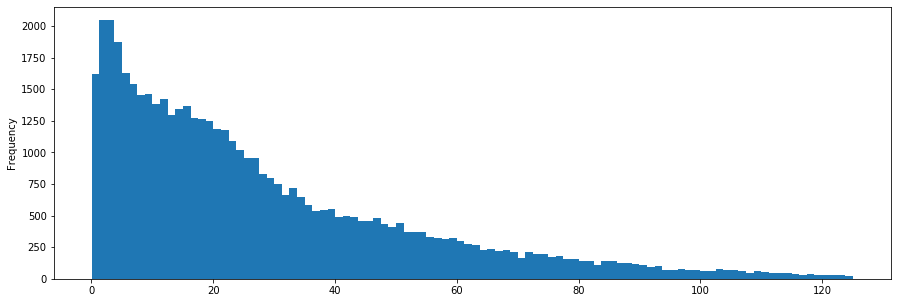

In [37]:
offer_trans_aggr[offer_trans_aggr['amount']<125].amount.plot.hist(bins=100, figsize=(15,5));


We can also reduce the skewness using logarithmic transformation. After eyeballing the below diagram and trying a few different values, 6.2 seems to be optimal to adjust our distribution. 

Skewness before: 1.2984382918854962
Skewness after:  0.00028334045788414285


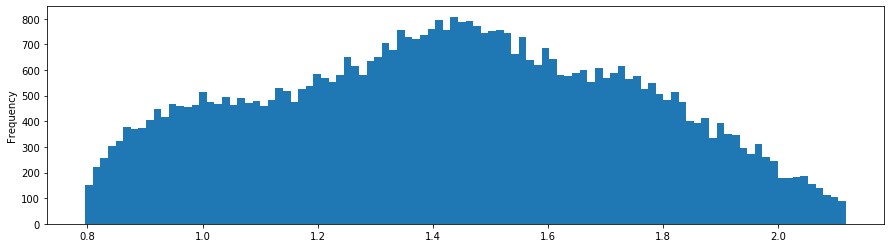

In [38]:
from scipy import stats

offer_trans_aggr = offer_trans_aggr[offer_trans_aggr['amount']<125]
s = stats.skew(offer_trans_aggr.amount)
print('Skewness before: {}'.format(s))
log_amount = np.log10(offer_trans_aggr.amount + 6.2)
s2 = stats.skew(log_amount)
print('Skewness after:  {}'.format(s2))

# I'll name the new column log_amount, as a reminder to transform the values back at the end 
offer_trans_aggr['log_amount'] = log_amount

log_amount.plot.hist(bins=100, figsize=(15,4));

In [39]:
offer_trans_aggr.describe().round(2)

,time_x,valid_flag,amount,log_amount
count,49890.00,49890.00,49890.00,49890.00
mean,314.84,0.64,28.20,1.43
std,197.99,0.48,25.15,0.32
min,0.00,0.00,0.05,0.80
25%,168.00,0.00,9.03,1.18
50%,336.00,1.00,20.76,1.43
75%,504.00,1.00,40.39,1.67
max,576.00,1.00,124.96,2.12


In [40]:
offer_trans_aggr.head()

,person,offer_id,time_x,valid_flag,amount,log_amount
0,0009655768c64bdeb2e877511632db8f,bogo_5d_5,408,0,22.16,1.452706
1,0009655768c64bdeb2e877511632db8f,bogo_5d_5,408,1,8.57,1.169380
2,0009655768c64bdeb2e877511632db8f,disc_10d_10,504,1,27.67,1.529815
3,0009655768c64bdeb2e877511632db8f,disc_7d_10,576,0,69.20,1.877371
4,0011e0d4e6b944f998e987f904e8c1e5,bogo_7d_5,504,1,54.04,1.779885


So let's add our portfolio and demographic data back one more time, and delete all unneccessary columns. 

In [41]:
offer_trans_profile = pd.merge(offer_trans_aggr, profile, on='person', how='left')
offer_trans_profile = pd.merge(offer_trans_profile, portfolio, on='offer_id', how='left')
offer_trans_profile.describe().round(2)

,time_x,valid_flag,amount,log_amount,age,income,member_days,female,male,other,reward,difficulty,duration,web,email,mobile,social,bogo,info,disc
count,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.00,49890.0,49890.0,49890.00,49890.00,49890.0,49890.00
mean,314.84,0.64,28.20,1.43,53.64,63887.07,652.10,0.41,0.58,0.01,5.40,9.36,7.12,0.87,1.0,0.9,0.67,0.53,0.0,0.47
std,197.99,0.48,25.15,0.32,17.61,21182.48,427.86,0.49,0.49,0.12,3.06,4.17,1.78,0.34,0.0,0.3,0.47,0.50,0.0,0.50
min,0.00,0.00,0.05,0.80,18.00,30000.00,86.00,0.00,0.00,0.00,2.00,5.00,5.00,0.00,1.0,0.0,0.00,0.00,0.0,0.00
25%,168.00,0.00,9.03,1.18,41.00,47000.00,317.00,0.00,0.00,0.00,3.00,5.00,5.00,1.00,1.0,1.0,0.00,0.00,0.0,0.00
50%,336.00,1.00,20.76,1.43,55.00,62000.00,526.00,0.00,1.00,0.00,5.00,10.00,7.00,1.00,1.0,1.0,1.00,1.00,0.0,0.00
75%,504.00,1.00,40.39,1.67,66.00,77000.00,934.00,1.00,1.00,0.00,10.00,10.00,7.00,1.00,1.0,1.0,1.00,1.00,0.0,1.00
max,576.00,1.00,124.96,2.12,101.00,120000.00,1909.00,1.00,1.00,1.00,10.00,20.00,10.00,1.00,1.0,1.0,1.00,1.00,0.0,1.00


In [42]:

offer_trans_profile.drop(columns=['person', 'offer_id', 'time_x', 'amount'], inplace=True)
# drop columns with 0 variance
offer_trans_profile.drop(columns=['email', 'info'], inplace=True)
offer_trans_profile.describe().round(3)

,valid_flag,log_amount,age,income,member_days,female,male,other,reward,difficulty,duration,web,mobile,social,bogo,disc
count,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000,49890.000
mean,0.636,1.425,53.643,63887.072,652.100,0.408,0.578,0.014,5.398,9.359,7.116,0.869,0.898,0.673,0.529,0.471
std,0.481,0.316,17.606,21182.480,427.861,0.491,0.494,0.118,3.061,4.168,1.783,0.337,0.303,0.469,0.499,0.499
min,0.000,0.796,18.000,30000.000,86.000,0.000,0.000,0.000,2.000,5.000,5.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,1.183,41.000,47000.000,317.000,0.000,0.000,0.000,3.000,5.000,5.000,1.000,1.000,0.000,0.000,0.000
50%,1.000,1.431,55.000,62000.000,526.000,0.000,1.000,0.000,5.000,10.000,7.000,1.000,1.000,1.000,1.000,0.000
75%,1.000,1.668,66.000,77000.000,934.000,1.000,1.000,0.000,10.000,10.000,7.000,1.000,1.000,1.000,1.000,1.000
max,1.000,2.118,101.000,120000.000,1909.000,1.000,1.000,1.000,10.000,20.000,10.000,1.000,1.000,1.000,1.000,1.000


This seems like a good breaking point, let's save this dataframe and move on to the [next notebook](Starbucks_Capstone_notebook4.ipynb).

In [43]:
offer_trans_profile.to_csv('data/offer_transaction_profile.csv', index=False)

In [3]:
offer_trans_profile = pd.read_csv('data/offer_transaction_profile.csv')
offer_trans_profile.head()

,valid_flag,log_amount,age,income,member_days,female,male,other,reward,difficulty,duration,web,mobile,social,bogo,disc
0,0,1.452706,33,72000.0,547,0,1,0,5,5,5,1,1,1,1,0
1,1,1.169380,33,72000.0,547,0,1,0,5,5,5,1,1,1,1,0
2,1,1.529815,33,72000.0,547,0,1,0,2,10,10,1,1,1,0,1
3,0,1.877371,33,72000.0,547,0,1,0,2,10,7,1,1,0,0,1
4,1,1.779885,40,57000.0,284,0,0,1,5,5,7,1,1,0,1,0
